# Another method to count Dyck paths

Except for counting Dyck paths recursively, we can try some other ideas, like

**Question** What if we consider all non-Dyck paths?

To make this question explicitly, we define a path of length $2n$ to be a path in $\mathbb{R}^2$ from $(0,0)$ to $(2n,0)$ as a composition of movements along the northeast direction $(1,1)$ or the southeast direction $(1,-1)$, a.k.a., a shortest path from the start to the end along edges of the grid graph. 

*A non-Dyck path is a path which has an intersection with the line $y = -1$.* 

Keep this in mind, and try to count the numbere of all the paths and the number of all the non-Dyck paths, we will have
$$
    \sharp \text{ of Dyck paths of length }2n = \sharp \text{ of paths of length }2n - \sharp \text{ of non-Dyck paths of length }2n.
$$

To count non-Dyck paths, one can follow the following two steps:
- **Step 1.** Assume $(k,-1)$ be the first intersection point of a non-Dyck path  and the line $y = -1$, where $k$ is an odd number and $1 \leqslant k \leqslant 2n-1$. We split a non-Dyck path into two subpaths, $P_1$ from $(0,0)$ to $(k,-1)$ and $P_2$ from $(k,-1)$ to $(2n,0)$.
- **Step 2.** We *reflect* $P_2$ along the line $y=-1$ to get a path $P_2'$ from $(k,-1)$ to $(2n,-2)$.
- **Step 3.** By connecting $P_1$ and $P_2'$, we have a new shortest path along the grid graph from $(0,0)$ to $(2n,-2)$. Easy to see,
    $$
        \sharp \text{ of non-Dyck paths of length }2n = \sharp \text{ of paths from } (0,0) \text{ to } (2n,-2).
    $$

Button(description='Random path', style=ButtonStyle())

Output()

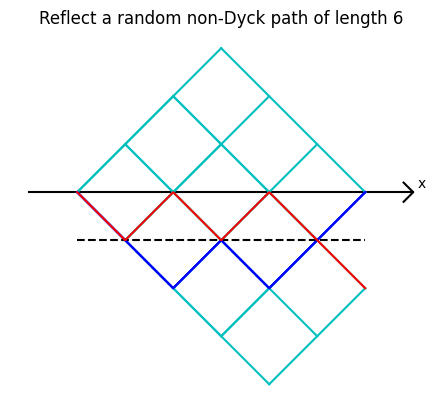

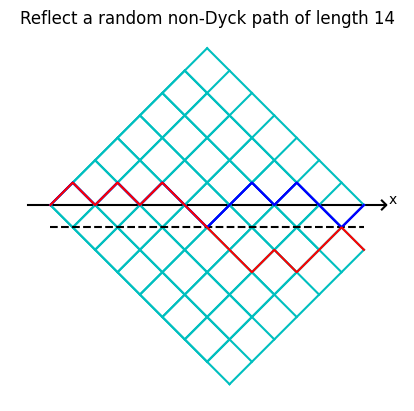

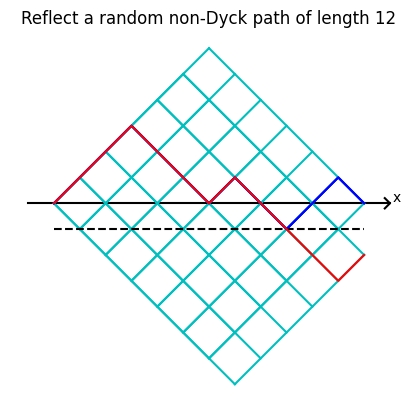

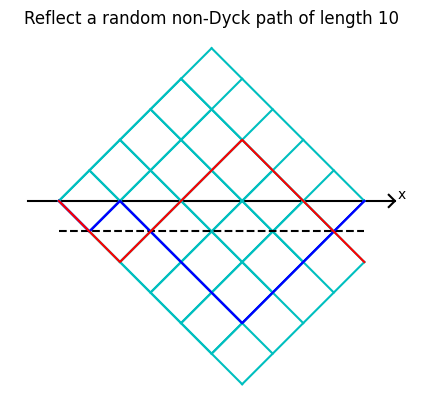

In [40]:
import ipywidgets as widgets
import numpy as np
from IPython.display import display,clear_output
from matplotlib import pyplot as plt
from matplotlib import animation
import random
import time

button = widgets.Button(description="Random path")
output_widget = widgets.Output()

display(button)

def reflection(change):
    l = random.randint(2,10)
    fig, ax = plt.subplots()
    ax.set_title(f'Reflect a random non-Dyck path of length {2*l}')
    ax.plot(np.arange(-1,2*l+2,step=1),np.array([0] * (2*l + 3)),'k')
    ax.plot(np.array([2*l+0.8,2*l+1,2*l+0.8]),np.array([-0.2,0,0.2]),'k')
    plt.text(2* l + 1.1,0.1,'x',color='k')
    for _ in range(l+1):
        ax.plot(np.arange(0,l+1,1) + _,np.arange(0,l+1,1) - _,'c')
        ax.plot(np.arange(0,l+1,1) + _,np.arange(0,-l-1,-1) + _,'c')
    for _ in range(l+2):
        ax.plot(np.arange(0,l,1) + _,np.arange(0,l,1) - _,'c')
    for _ in range(l):
        ax.plot(np.arange(0,l+2,1) + _,np.arange(0,-l-2,-1) + _,'c')
    ax.set_aspect('equal')
    path = [0]
    u,d = 0,0
    for _ in range(2 * l):
        if random.randint(0,1):
            step = 1
        else:
            step = -1
        path.append(path[-1] + step)
        u += step + 1
        d += 1 - step
        if u == 2 * l - 2:
            while path[-1] > -2:
                path.append(path[-1] -1)
            break
        if d == 2 * l + 2:
            while path[-1] < -2:
                path.append(path[-1] +1)
            break
    newpath,flag = [],False
    for y in path:
        if not flag:
            if y > -1:
                newpath.append(y)
            else:
                flag = True
                newpath.append(-2-y)
        else:
            newpath.append(-2-y)
    ax.plot(np.arange(0,len(path),1), np.array(newpath),'b')
    plt.axis('off')
    plt.grid(False)
    plt.text(l,-l-2,'')
    
    with output_widget:
        output_widget.clear_output()
        clear_output(wait=True)
        display(fig)
        time.sleep(1)
        ax.plot(np.arange(0,2*l+1,step=1),np.array([-1] * (2*l + 1)),'k--')
        clear_output(wait=True)
        display(fig)
        time.sleep(1)
        ax.plot(np.arange(0,len(path),1), np.array(newpath),'b')
        ax.plot(np.arange(0,len(path),1), np.array(path),'r')
        clear_output(wait=True)
        display(fig)
        time.sleep(0.2)
        
        
button.on_click(reflection)
display(output_widget)

Hence, we have
$$
    C_n = \binom{2n}{n} - \binom{2n}{n-1} = (1-\frac{n}{n+1}) \binom{2n}{n} = \frac{1}{n+1} \binom{2n}{n}.
$$